# WEATHER PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('weather2.csv')

In [4]:
dataset.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [5]:
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [6]:
dataset.shape

(100990, 20)

In [7]:
dataset.keys()

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [8]:
dataset=dataset.drop([' _fog',' _hail',' _heatindexm',' _precipm',' _snow',' _thunder',' _tornado',' _vism',' _wdird',' _wdire',' _wgustm',' _windchillm',' _wspdm'],axis=1)

In [9]:
dataset

,datetime_utc,_conds,_dewptm,_hum,_pressurem,_rain,_tempm
0,19961101-11:00,Smoke,9.0,27.0,1010.0,0,30.0
1,19961101-12:00,Smoke,10.0,32.0,-9999.0,0,28.0
2,19961101-13:00,Smoke,11.0,44.0,-9999.0,0,24.0
3,19961101-14:00,Smoke,10.0,41.0,1010.0,0,24.0
4,19961101-16:00,Smoke,11.0,47.0,1011.0,0,23.0
5,19961101-17:00,Smoke,12.0,56.0,1011.0,0,21.0
6,19961101-18:00,Smoke,13.0,60.0,1010.0,0,21.0
7,19961101-19:00,Smoke,13.0,60.0,-9999.0,0,21.0
8,19961101-20:00,Smoke,13.0,68.0,-9999.0,0,19.0
9,19961101-21:00,Smoke,13.0,68.0,1010.0,0,19.0


In [10]:
dataset=dataset[dataset['datetime_utc']>'20021231-23:30']

In [11]:
dataset.shape


(61023, 7)

In [12]:
dataset.index=range(61023)

In [13]:
dataset

,datetime_utc,_conds,_dewptm,_hum,_pressurem,_rain,_tempm
0,20030101-00:30,Fog,NaN,NaN,1017.0,0,NaN
1,20030101-01:30,Fog,9.0,100.0,1018.0,0,9.0
2,20030101-02:30,Fog,9.0,100.0,1019.0,0,9.0
3,20030101-03:30,Fog,9.0,100.0,1019.0,0,9.0
4,20030101-04:30,Fog,10.0,94.0,1021.0,0,11.0
5,20030101-05:30,Fog,11.0,94.0,1021.0,0,12.0
6,20030101-06:30,Fog,12.0,94.0,1020.0,0,13.0
7,20030101-07:30,Mostly Cloudy,11.0,82.0,1019.0,0,14.0
8,20030101-08:30,Smoke,9.0,67.0,1019.0,0,15.0
9,20030101-09:30,Smoke,11.0,72.0,1019.0,0,16.0


In [14]:
dataset.to_csv('roshni.csv',index=False)

In [15]:
newdata=pd.read_csv('roshni.csv')

In [16]:
newdata

,datetime_utc,_conds,_dewptm,_hum,_pressurem,_rain,_tempm
0,20030101-00:30,Fog,NaN,NaN,1017.0,0,NaN
1,20030101-01:30,Fog,9.0,100.0,1018.0,0,9.0
2,20030101-02:30,Fog,9.0,100.0,1019.0,0,9.0
3,20030101-03:30,Fog,9.0,100.0,1019.0,0,9.0
4,20030101-04:30,Fog,10.0,94.0,1021.0,0,11.0
5,20030101-05:30,Fog,11.0,94.0,1021.0,0,12.0
6,20030101-06:30,Fog,12.0,94.0,1020.0,0,13.0
7,20030101-07:30,Mostly Cloudy,11.0,82.0,1019.0,0,14.0
8,20030101-08:30,Smoke,9.0,67.0,1019.0,0,15.0
9,20030101-09:30,Smoke,11.0,72.0,1019.0,0,16.0


In [17]:
newdata.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _hum', ' _pressurem', ' _rain',
       ' _tempm'],
      dtype='object')

In [18]:
newdata.isnull().sum()

datetime_utc      0
 _conds          72
 _dewptm        223
 _hum           338
 _pressurem     232
 _rain            0
 _tempm         270
dtype: int64

In [19]:
newdata.dropna(inplace=True)

In [20]:
newdata.isnull().sum()

datetime_utc    0
 _conds         0
 _dewptm        0
 _hum           0
 _pressurem     0
 _rain          0
 _tempm         0
dtype: int64

In [21]:
newdata.shape

(60410, 7)

In [22]:
newdata

,datetime_utc,_conds,_dewptm,_hum,_pressurem,_rain,_tempm
1,20030101-01:30,Fog,9.0,100.0,1018.0,0,9.0
2,20030101-02:30,Fog,9.0,100.0,1019.0,0,9.0
3,20030101-03:30,Fog,9.0,100.0,1019.0,0,9.0
4,20030101-04:30,Fog,10.0,94.0,1021.0,0,11.0
5,20030101-05:30,Fog,11.0,94.0,1021.0,0,12.0
6,20030101-06:30,Fog,12.0,94.0,1020.0,0,13.0
7,20030101-07:30,Mostly Cloudy,11.0,82.0,1019.0,0,14.0
8,20030101-08:30,Smoke,9.0,67.0,1019.0,0,15.0
9,20030101-09:30,Smoke,11.0,72.0,1019.0,0,16.0
10,20030101-10:30,Smoke,11.0,72.0,1019.0,0,16.0


In [23]:
newdata.to_csv('weathernew.csv')

In [24]:
newdata[' _conds'].unique()

array(['Fog', 'Mostly Cloudy', 'Smoke', 'Shallow Fog', 'Scattered Clouds',
       'Partly Cloudy', 'Mist', 'Clear', 'Unknown', 'Haze',
       'Light Drizzle', 'Rain', 'Heavy Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Light Rain', 'Drizzle',
       'Light Thunderstorms and Rain', 'Heavy Rain', 'Overcast',
       'Volcanic Ash', 'Thunderstorm', 'Widespread Dust',
       'Light Thunderstorm', 'Thunderstorms with Hail', 'Partial Fog',
       'Light Fog', 'Heavy Fog', 'Patches of Fog', 'Blowing Sand',
       'Sandstorm', 'Funnel Cloud', 'Light Hail Showers',
       'Light Sandstorm', 'Light Rain Showers', 'Rain Showers'],
      dtype=object)

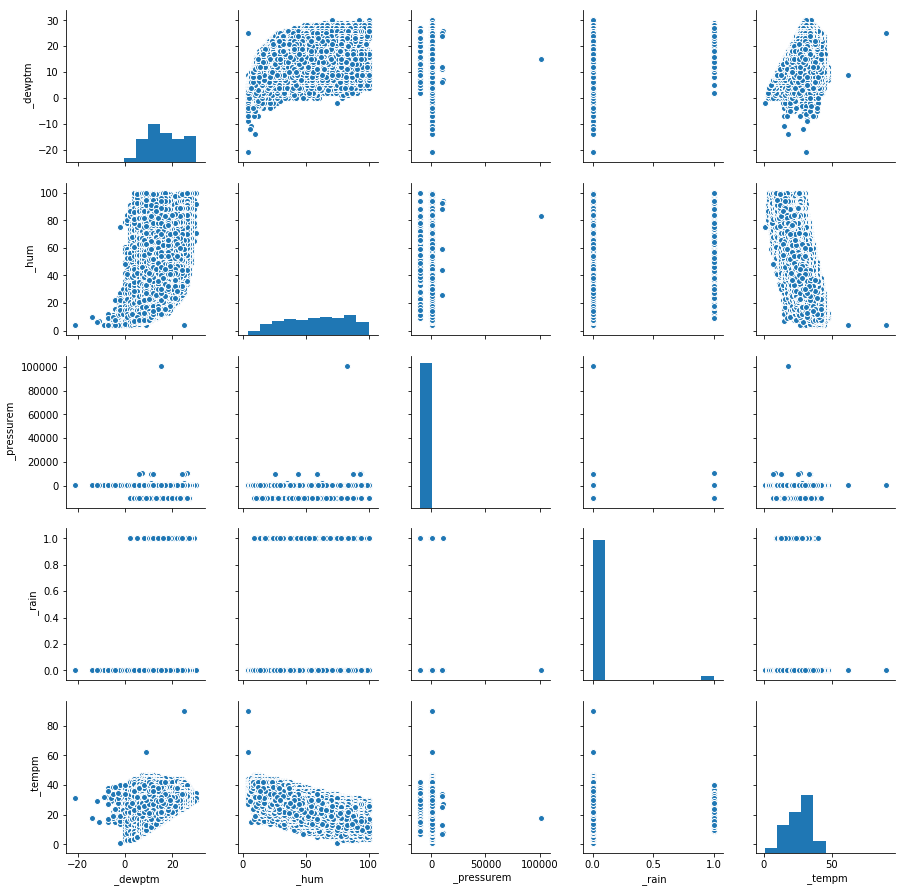

In [25]:
import seaborn as sns
sns.pairplot(newdata)


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
newdata[' _conds']=labelencoder.fit_transform(newdata[' _conds'])

In [27]:
newdata

,datetime_utc,_conds,_dewptm,_hum,_pressurem,_rain,_tempm
1,20030101-01:30,3,9.0,100.0,1018.0,0,9.0
2,20030101-02:30,3,9.0,100.0,1019.0,0,9.0
3,20030101-03:30,3,9.0,100.0,1019.0,0,9.0
4,20030101-04:30,3,10.0,94.0,1021.0,0,11.0
5,20030101-05:30,3,11.0,94.0,1021.0,0,12.0
6,20030101-06:30,3,12.0,94.0,1020.0,0,13.0
7,20030101-07:30,18,11.0,82.0,1019.0,0,14.0
8,20030101-08:30,28,9.0,67.0,1019.0,0,15.0
9,20030101-09:30,28,11.0,72.0,1019.0,0,16.0
10,20030101-10:30,28,11.0,72.0,1019.0,0,16.0


In [28]:
newdata['date']=newdata['datetime_utc'].str.split('-').str.get(0)
newdata['time']=newdata['datetime_utc'].str.split('-').str.get(1)

In [29]:
newdata=newdata.drop(['datetime_utc'],axis=1)

In [30]:
newdata['time']=newdata['time'].str.split(':').str.get(0)

In [31]:
newdata

,_conds,_dewptm,_hum,_pressurem,_rain,_tempm,date,time
1,3,9.0,100.0,1018.0,0,9.0,20030101,01
2,3,9.0,100.0,1019.0,0,9.0,20030101,02
3,3,9.0,100.0,1019.0,0,9.0,20030101,03
4,3,10.0,94.0,1021.0,0,11.0,20030101,04
5,3,11.0,94.0,1021.0,0,12.0,20030101,05
6,3,12.0,94.0,1020.0,0,13.0,20030101,06
7,18,11.0,82.0,1019.0,0,14.0,20030101,07
8,28,9.0,67.0,1019.0,0,15.0,20030101,08
9,28,11.0,72.0,1019.0,0,16.0,20030101,09
10,28,11.0,72.0,1019.0,0,16.0,20030101,10


In [32]:
newdata[' _conds'].unique()

array([ 3, 18, 28, 27, 26, 21, 17,  1, 32,  5,  9, 23,  8, 30, 12,  2, 16,
        7, 19, 33, 29, 34, 15, 31, 20, 10,  6, 22,  0, 25,  4, 11, 14, 13,
       24], dtype=int64)

In [33]:
newdata[' _conds'].unique().max()

34

In [34]:
newdata[' _conds'].unique().min()

0

In [35]:
X=newdata.iloc[:, [1,2,3,4,5,6,7]].values
y=newdata.iloc[:, 0].values

In [36]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)

C:\Users\Chanchal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
X_train.shape

(54369, 7)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [40]:
y_pred=classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix

In [42]:
accuracy_score(y_test,y_pred)

0.7626220824366826

In [45]:
s=labelencoder.inverse_transform(y_pred)

C:\Users\Chanchal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
p=np.array([1,200,389,0,34,2007103,8])
p=p.reshape(1,-1)
r=classifier.predict(p)
q=labelencoder.inverse_transform(r)
q

C:\Users\Chanchal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Fog'], dtype=object)